In [1]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


import PIL

In [2]:
img_dir = '/Users/Kirill/lerning/Kaggle/Face Mask Detection/images'             # Путь до файлов
annot_dir = '/Users/Kirill/lerning/Kaggle/Face Mask Detection/annotations'

output_dir = '/kaggle/working/'

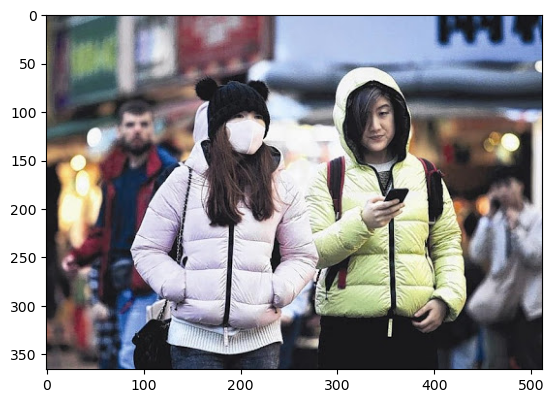

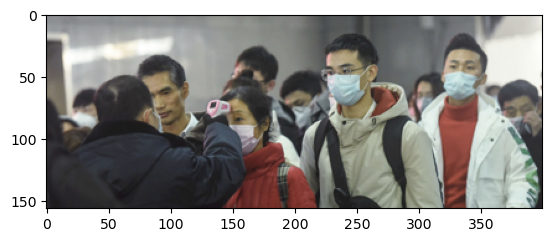

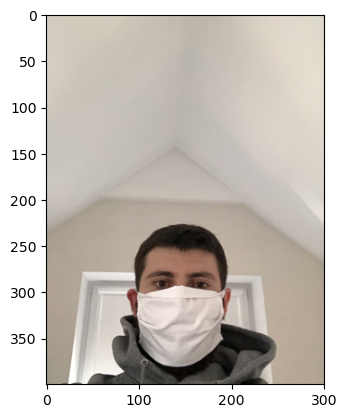

In [7]:
for idx, image in enumerate(os.listdir(img_dir)):  # listdir открывает все, что находится в папке img_dir
    img = cv2.imread(os.path.join(img_dir, image)) # Соединение пути и объекта (img_dir и image)
    imageRGB = cv2.cvtColor(img , cv2.COLOR_BGR2RGB) # Изначально передаются цвета в формате BGR, поэтому все фотки синие
    plt.imshow(imageRGB)                             # cv2.COLOR_BGR2RGB преобразует в правильную последовательнось цветов
    plt.show()
    if idx==2:
        break

In [8]:
img_file = []                                         # Создание пустого списка
for img in os.listdir(img_dir):                       # Итерация по объектам
    images = cv2.imread(os.path.join(img_dir, img))   # Соединение пути с объектом
    img_file.append(images)                           # Добавление в список

In [9]:
import requests

In [5]:
import xml.etree.ElementTree as ET
import glob

In [11]:
import glob

In [6]:
# Два варианта вытащить полный путь до файла

# glob.glob(annot_dir + '/*xml')       # Путь до файла целиком

# exemple = []
# for anno in os.listdir(annot_dir):      # Либо без использования glob,с помощью итарации
#     ex = os.path.join(annot_dir, anno)  # Оба варианта будут идентичными
#     exemple.append(ex)

In [7]:
df = {'name': [],      # Создание словаря, который в будущем будет переделан в датафрейм
     'label': [],
     'widht': [],
     'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}

width = []
height = []

for idx, anno in enumerate(glob.glob(annot_dir + '/*.xml')):                    # Итерация по индексам и пути файла
    trees = ET.parse(anno).getroot()                                            # Создание корня 
    for item in trees.iter():                                                   # Итерация по всему дереву файла
        if item.tag == 'size':                                                  # Поиск по tag
            for attr in list(item):                                             # Переход в следующую ветвь
                if attr.tag =='width':
                    width = int(attr.text)                                      # Если сразу добавлять в датасет
                if attr.tag == 'height':                                        # будет несоответствие размеров
                    height = int(attr.text)
                                                                                # В остальном все идентично
        if item.tag == 'object':
            for attr in list(item):
                if attr.tag == 'name':
                    df['label'].append(attr.text)
                    df['widht'].append(width)
                    df['height'].append(height)
                    df['name'].append(anno.split('/')[-1].split('\\')[-1][0:-4])
                    
                if attr.tag == 'bndbox':
                    for coor in list(attr):
                        if coor.tag == 'xmin':
                            df['xmin'].append(int(coor.text))
                        if coor.tag == 'ymin':
                            df['ymin'].append(int(coor.text))
                        if coor.tag == 'xmax':
                            df['xmax'].append(int(coor.text))
                        if coor.tag == 'ymax':
                            df['ymax'].append(int(coor.text))

In [8]:
data = pd.DataFrame(df)
data.head()

name         label  widht  height  xmin  ymin  xmax  ymax
0  maksssksksss0  without_mask    512     366    79   105   109   142
1  maksssksksss0     with_mask    512     366   185   100   226   144
2  maksssksksss0  without_mask    512     366   325    90   360   141
3  maksssksksss1     with_mask    400     156   321    34   354    69
4  maksssksksss1     with_mask    400     156   224    38   261    73

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072 entries, 0 to 4071
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    4072 non-null   object
 1   label   4072 non-null   object
 2   widht   4072 non-null   int64 
 3   height  4072 non-null   int64 
 4   xmin    4072 non-null   int64 
 5   ymin    4072 non-null   int64 
 6   xmax    4072 non-null   int64 
 7   ymax    4072 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 254.6+ KB


In [10]:
data['label'].unique()

array(['without_mask', 'with_mask', 'mask_weared_incorrect'], dtype=object)

In [11]:
label_map = {'without_mask': 0,
            'with_mask': 1,
            'mask_weared_incorrect':2}

data['class'] = data['label'].map(label_map)

In [12]:
data.head(5)

name         label  widht  height  xmin  ymin  xmax  ymax  class
0  maksssksksss0  without_mask    512     366    79   105   109   142      0
1  maksssksksss0     with_mask    512     366   185   100   226   144      1
2  maksssksksss0  without_mask    512     366   325    90   360   141      0
3  maksssksksss1     with_mask    400     156   321    34   354    69      1
4  maksssksksss1     with_mask    400     156   224    38   261    73      1

In [13]:
fileNames = os.listdir('/Users/Kirill/lerning/Kaggle/Face Mask Detection/images')

In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(fileNames, test_size = 0.15, random_state=42)
test,val = train_test_split(test, test_size=0.3, random_state=42)

print('Train {} | Test {} | Val {}'.format(len(train), len(test), len(val)))

Train 725 | Test 89 | Val 39


In [32]:
# os.mkdir('./yolov5/data/train')
# os.mkdir('./yolov5/data/val')
# os.mkdir('./yolov5/data/test')
# os.mkdir('./yolov5/data/train/images')
# os.mkdir('./yolov5/data/train/labels')
# os.mkdir('./yolov5/data/test/images')
# os.mkdir('./yolov5/data/test/labels')
# os.mkdir('./yolov5/data/val/images')
# os.mkdir('./yolov5/data/val/labels')

In [19]:
from PIL import Image

def copyImages(imageList, folder_Name):
    for image in imageList:
        img = Image.open("/Users/Kirill/lerning/Kaggle/Face Mask Detection/images/"+image)
        img1 = img.resize((640, 480))
        _ = img1.save("./yolov5/data/"+folder_Name+"/images/"+image)

In [20]:
copyImages(train, "train")
copyImages(val, "val")
copyImages(test, "test")

In [22]:
data.head()

name         label  widht  height  xmin  ymin  xmax  ymax  class
0  maksssksksss0  without_mask    512     366    79   105   109   142      0
1  maksssksksss0     with_mask    512     366   185   100   226   144      1
2  maksssksksss0  without_mask    512     366   325    90   360   141      0
3  maksssksksss1     with_mask    400     156   321    34   354    69      1
4  maksssksksss1     with_mask    400     156   224    38   261    73      1

In [23]:
data['xmax'] = (640/data['widht'])*data['xmax']
data['ymax'] = (480/data['height'])*data['ymax']
data['xmin'] = (640/data['widht'])*data['xmin']
data['ymin'] = (480/data['height'])*data['ymin']

data[['xmax', 'ymax', 'xmin', 'ymin']] = data[['xmax', 'ymax', 'xmin', 'ymin']].astype('int64')

In [24]:
data['x_center'] = (data['xmax']+data['xmin'])/(2*640)
data['y_center'] = (data['ymax']+data['ymin'])/(2*480)
data['box_height'] = (data['xmax']-data['xmin'])/(640)
data['box_width'] = (data['ymax']-data['ymin'])/(480)

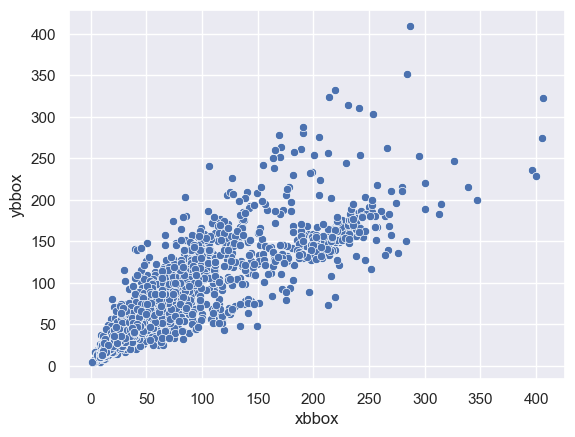

In [25]:
data['xbbox'] = data['xmax']-data['xmin']
data['ybbox'] = data['ymax']-data['ymin']

sns.set()
sns.scatterplot(x='xbbox',  y='ybbox', data=data)
plt.show()

In [26]:
data = data.astype('string')

In [27]:
def create_labels(image_list, data_name):
    fileNames = [x.split(".")[0] for x in image_list]

    for name in fileNames:
        df = data[data.name==name]
        box_list = []
        
        for index in range(len(df)):
            row = df.iloc[index]
            box_list.append(row['class']+" "+row["x_center"]+" "+row["y_center"]\
                        +" "+row["box_height"]+" "+row["box_width"])
            
        text = "\n".join(box_list)
        with open("./yolov5/data/"+data_name+"/labels/"+name+".txt", "w") as file:
            file.write(text)        

In [28]:
create_labels(train, "train")
create_labels(val, "val")
create_labels(test, "test")

In [31]:
%cd yolov5 # Директория где находится сам yolo

[WinError 2] Не удается найти указанный файл: 'yolov5 # Директория где находится сам yolo'
C:\Users\Kirill\lerning\Kaggle\Face Mask Detection\yolov5


### Configuration model

In [32]:
from IPython.display import Image, Video, clear_output  # to display images
import torch
from yolov5 import utils
display = utils.notebook_init()

YOLOv5  2023-8-7 Python-3.10.9 torch-2.0.1 CUDA:0 (NVIDIA GeForce GTX 1070, 8192MiB)


Setup complete  (4 CPUs, 23.9 GB RAM, 116.4/223.0 GB disk)


In [34]:
yaml_text = """train: data/train/images
val: data/train/images

nc: 3
names: ['with_mask', 'mask_weared_incorrect', 'without_mask']"""

In [36]:
with open("data/data.yaml", 'w') as file:
    file.write(yaml_text)

In [38]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [40]:
%%writetemplate models/custom_yolov5s.yaml

# parameters
nc: 3  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
    - [10,13, 16,30, 33,23]  # P3/8
    - [30,61, 62,45, 59,119]  # P4/16
    - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
    [[-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, 'nearest']],
    [[-1, 6], 1, Concat, [1]],  # cat backbone P4
    [-1, 3, BottleneckCSP, [512, False]],  # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, 'nearest']],
    [[-1, 4], 1, Concat, [1]],  # cat backbone P3
    [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]],  # cat head P4
    [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]],  # cat head P5
    [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

    [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
    ]

### Train model

In [45]:
# train yolov5s on custom data for 100 epochs
# time its performance

start = datetime.now()
!python train.py --img 640 --batch 32 --epochs 100 --data data/data.yaml --cfg models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache
end = datetime.now()

train: weights='', cfg=models/custom_yolov5s.yaml, data=data/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   0897415..dd10481  master     -> origin/master
github:  YOLOv5 is out of date by 7 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
fatal: cannot change to 'C:\Users\Kirill\lerning\Kaggle\Face': No such file or directory
YOLOv5  2023-8-7 Python-3.10.9 torch-2.0.1 CUDA:0 (NVIDIA GeForce GTX 1070,

In [46]:
print("Runtime =",end-start)

Runtime = 0:52:01.449784


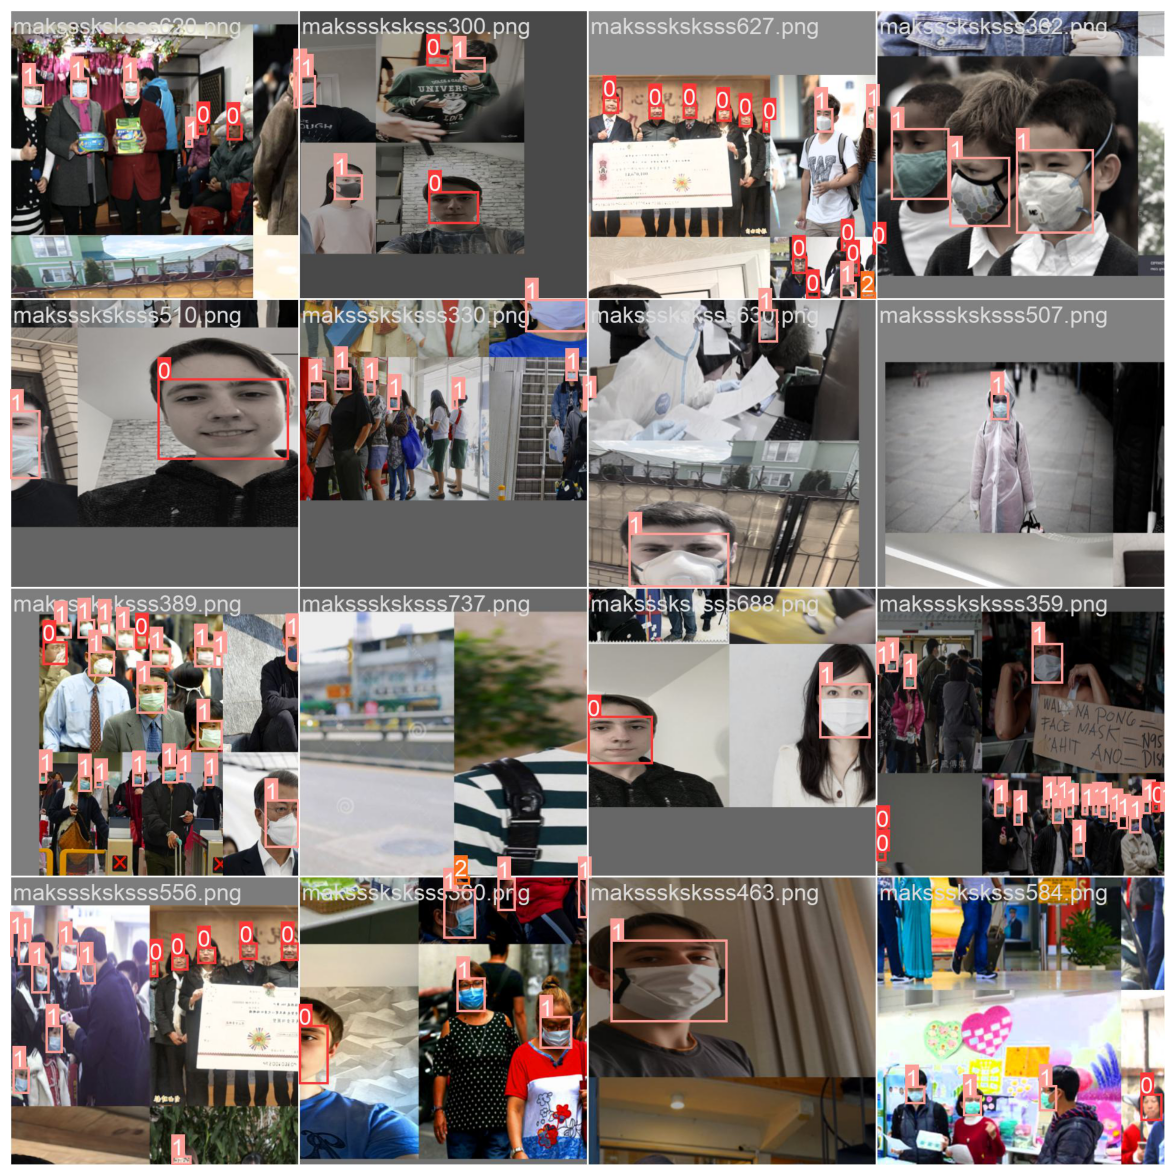

In [52]:
img = plt.imread('runs/train/yolov5s_results/train_batch0.jpg')
plt.figure(figsize=(20,15))
plt.imshow(img)
plt.axis('off')
plt.show()